In [1]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

import live_loss_plot

Using TensorFlow backend.


In [2]:
# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [4]:
plot_losses = live_loss_plot.PlotLosses() 

In [5]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',  # 'mean_squared_error'
              metrics=['accuracy', 'mean_squared_error'])

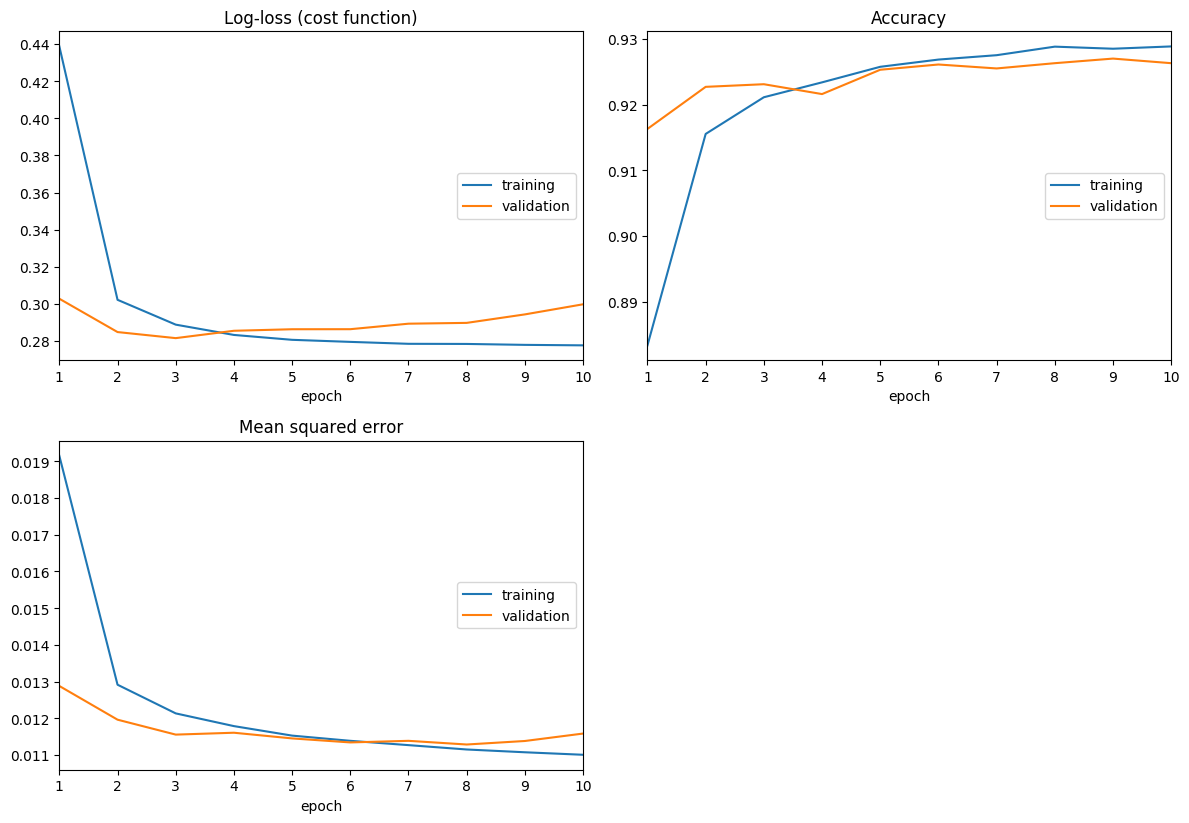

In [6]:
model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)